In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from scipy.optimize import curve_fit

In [2]:
datadir = 'C:/Users/khana/Documents/Masters/Semester 2/Earth and System Modelling/PLASIM/PLASIM Data/'
Data = xr.open_dataset(datadir + 'm100_monthly.nc')

In [3]:
GMST = Data.ts.mean('lat').mean('lon')
yearlyGMST = np.zeros(30)
a = 0
m = 0
j = 0
for i in range(360):
    if (a!=12):
        m = m+GMST[i]
        a = a + 1
        if (a == 12):
            yearlyGMST[j] = m/12
            j = j + 1
            m = 0
            a = 0
years = [i for i in range(30)]

In [4]:
def R(t,q1,d1,q2,d2):
    return q1*np.exp(-t/d1)+q2*np.exp(-t/d2)

def C(tau):
    co2 = [285 for i in range(30)]
    co2[1] = 185
    return co2[tau]

def F(tau):
    F2x=3.74
    Fext=0
    return (F2x/np.log(2))*np.log(C(tau)/C(0))+Fext

def T(years,q1,d1,q2,d2):
    T1=np.zeros(30)
    for t in range(len(years)):
        for i in range(t):
            T1[t] = T1[t]+R(t-i,q1,d1,q2,d2)*F(i)
    return T1

def temp(time,q1,d1,q2,d2):
    return T(time,q1,d1,q2,d2)+yearlyGMST[0]

In [14]:
print(T(years, 0.33, 239, 0.41, 4.1))

[ 0.          0.         -1.51530263 -1.34997771 -1.21975596 -1.11704262
 -1.03588672 -0.97162525 -0.92060446 -0.87996138 -0.84745267 -0.82132053
 -0.8001876  -0.7829746  -0.76883585 -0.7571087  -0.7472739  -0.73892457
 -0.73174188 -0.72547602 -0.7199312  -0.71495401 -0.71042425 -0.70624771
 -0.70235055 -0.69867491 -0.69517545 -0.69181661 -0.68857055 -0.68541541]


In [9]:
popt1, pcov1 = curve_fit(temp, years, yearlyGMST)

In [10]:
popt1

array([0.68486882, 1.79218426, 0.69285424, 1.79218515])

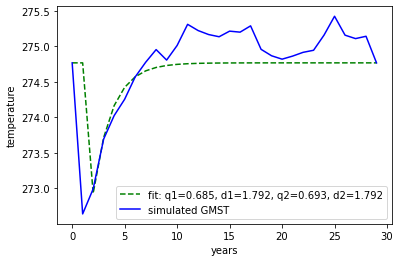

In [11]:
plt.plot(years, temp(years, *popt1), 'g--', label='fit: q1=%5.3f, d1=%5.3f, q2=%5.3f, d2=%5.3f' % tuple(popt1))
plt.plot(years, yearlyGMST, 'b-', label='simulated GMST')
plt.xlabel('years')
plt.ylabel('temperature')
plt.legend()
plt.show()

In [12]:
for i in range(30):
    print(T(i,0.33,239,0.41,4.1))

TypeError: object of type 'int' has no len()